In [2]:
from quspin.operators import hamiltonian
from quspin.operators import commutator# Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC  [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC# [[J,i,(i+1)%L] for i in range(L)] # PBC
    # static and dynamic lists
    static = [["zz",J_arr],["x",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

In [4]:
def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] 
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [5]:
def gauge_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    V_mat=np.matrix(V)
    V_mat_H=V_mat.H
    op_lamb_mat = np.matrix(del_lambda_Ham(L).toarray())
    num_lamb_mat =  (V_mat_H)*(op_lamb_mat*V_mat) #matrix multiplication
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    A_lamb = -1j*np.multiply(wij,num_lamb_mat)/(wij**2+ mu**2)#element-wise multiplication
    return A_lamb

In [6]:
muTot=200
L=2
hz=5
norm_arr_intL2=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_intL2[i]=norm(A_lamb)

In [12]:
muTot=200
L=2
norm_arr_nonintL2=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonintL2[i]=norm(A_lamb)

In [8]:
muTot=200
L=4
hz=5
norm_arr_intL4=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_intL4[i]=norm(A_lamb)

In [13]:
muTot=200
L=4
norm_arr_nonintL4=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonintL4[i]=norm(A_lamb)

In [14]:
muTot=200
L=6
hz=5
norm_arr_intL6=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_intL6[i]=norm(A_lamb)

In [44]:
L=6
hz=5.0
H=Ham_int_antiferro(L,hz)
E,V= H.eigh()
wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
index_lower = np.tril_indices(2**L,-1)
wij_arr=wij[index_lower]
print min(wij_arr), max(wij_arr)

0.0953783318915 60.5007524586


In [13]:
muTot=200
L=6
norm_arr_nonintL6=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonintL6[i]=norm(A_lamb)

In [39]:
L=6
H=Ham_nonint(L)
E,V= H.eigh()
wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
index_lower = np.tril_indices(2**L,-1)
wij_arr=wij[index_lower]
print min(wij_arr), max(wij_arr), len(E)

0.00172247690936 18.2585719543 64


In [10]:
muTot=200
L=8
hz=5
norm_arr_intL8=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_int_antiferro(L,hz)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_intL8[i]=norm(A_lamb)

In [15]:
muTot=200
L=8
norm_arr_nonintL8=np.zeros(muTot)
mu_arr=np.logspace(-10,10,muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonintL8[i]=norm(A_lamb)

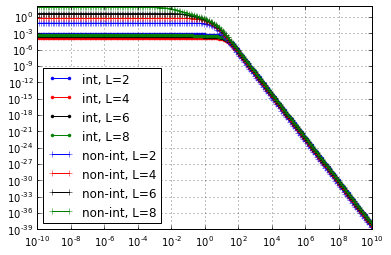

In [18]:
plt.loglog(mu_arr,norm_arr_intL2**2/2**2, 'b.-', label='int, L=2')
plt.loglog(mu_arr,norm_arr_intL4**2/2**4, 'r.-', label='int, L=4')
plt.loglog(mu_arr,norm_arr_intL6**2/2**6, 'k.-', label='int, L=6')
plt.loglog(mu_arr,norm_arr_intL8**2/2**8, 'g.-', label='int, L=8')
plt.loglog(mu_arr,norm_arr_nonintL2**2/2**2, 'b+-', label='non-int, L=2')
plt.loglog(mu_arr,norm_arr_nonintL4**2/2**4, 'r+-', label='non-int, L=4')
plt.loglog(mu_arr,norm_arr_nonintL6**2/2**6, 'k+-', label='non-int, L=6')
plt.loglog(mu_arr,norm_arr_nonintL8**2/2**8, 'g+-', label='non-int, L=8')
plt.legend(loc='best')
plt.grid()

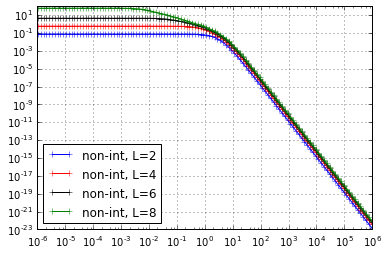

In [21]:
plt.loglog(mu_arr[40:160],norm_arr_nonintL2[40:160]**2/2**2, 'b+-', label='non-int, L=2')
plt.loglog(mu_arr[40:160],norm_arr_nonintL4[40:160]**2/2**4, 'r+-', label='non-int, L=4')
plt.loglog(mu_arr[40:160],norm_arr_nonintL6[40:160]**2/2**6, 'k+-', label='non-int, L=6')
plt.loglog(mu_arr[40:160],norm_arr_nonintL8[40:160]**2/2**8, 'g+-', label='non-int, L=8')
plt.legend(loc='best')
plt.grid()

In [21]:
x1,y1=np.loadtxt("v2.0_L6_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x2,y2=np.loadtxt("v2.0_L6_int_mu_scaling.dat",unpack=True,skiprows=3)

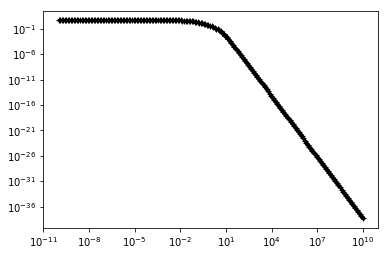

In [25]:
plt.loglog(mu_arr,norm_arr_nonintL6**2/2**6, 'k.-', label='non-int, L=6')
plt.loglog(x1,y1/2**6, 'k+-', label='non-int, L=6')

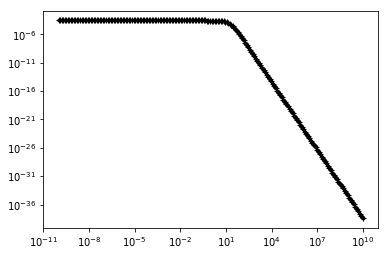

In [24]:
plt.loglog(mu_arr,norm_arr_intL6**2/2**6, 'k.-', label='non-int, L=6')
plt.loglog(x2,y2/2**6, 'k+-', label='non-int, L=6')

In [18]:
w1,z1=np.loadtxt("Test_L6_int_mu_scaling.dat",unpack=True,skiprows=3 )
w2,z2=np.loadtxt("Test_L6_nonint_mu_scaling.dat",unpack=True,skiprows=3)

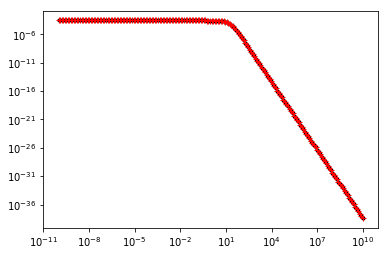

In [34]:
plt.loglog(mu_arr,norm_arr_intL6**2/2**6, 'k.-', label='non-int, L=6')
plt.loglog(x2,y2/2**6, 'r+-', label='non-int, L=6')

In [35]:
from scipy.optimize import curve_fit
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c
L=6
xdata =x2[180:]
ydata = y2[180:]/2**L
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)
a_in,b_in=popt
print " num,th:", np.exp(a_in), 4*2*(L-1) 

[ 3.68887945 -4.        ] [  2.88157393e-27   6.61576885e-30]
 num,th: 40.0 40


In [36]:
from scipy.optimize import curve_fit
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c
xdata =x1[180:]
ydata = y1[180:]/2**6
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)
a_in,b_in=popt
hz=(np.sqrt(5)+1)/4 
L=6
print " num,th:", np.exp(a_in), 4*(L*hz**2+2*(L-1))

[ 4.02012742 -4.        ] [  8.23306684e-28   1.89021966e-30]
 num,th: 55.7082039325 55.7082039325


### Analyzing data

In [126]:
x1,y1=np.loadtxt("v2.0_L6_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x2,y2=np.loadtxt("v2.0_L6_int_mu_scaling.dat",unpack=True,skiprows=3)
x3,y3=np.loadtxt("v2.0_L8_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x4,y4=np.loadtxt("v2.0_L8_int_mu_scaling.dat",unpack=True,skiprows=3)
x5,y5=np.loadtxt("v2.0_L10_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x6,y6=np.loadtxt("v2.0_L10_int_mu_scaling.dat",unpack=True,skiprows=3)
x7,y7=np.loadtxt("v2.0_L12_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x8,y8=np.loadtxt("v2.0_L12_int_mu_scaling.dat",unpack=True,skiprows=3)
x9,y9=np.loadtxt("v2.0_L14_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x10,y10=np.loadtxt("v2.0_L14_int_mu_scaling.dat",unpack=True,skiprows=3)

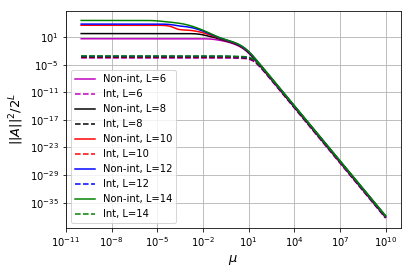

In [49]:
plt.loglog(x1,y1/2**6, 'm-', label='Non-int, L=6')
plt.loglog(x2,y2/2**6, 'm--', label='Int, L=6')
plt.loglog(x3,y3/2**8, 'k-', label='Non-int, L=8')
plt.loglog(x4,y4/2**8, 'k--', label='Int, L=8')
plt.loglog(x5,y5/2**10, 'r-', label='Non-int, L=10')
plt.loglog(x6,y6/2**10, 'r--', label='Int, L=10')
plt.loglog(x7,y7/2**12, 'b-', label='Non-int, L=12')
plt.loglog(x8,y8/2**12, 'b--', label='Int, L=12')
plt.loglog(x9,y9/2**14, 'g-', label='Non-int, L=14')
plt.loglog(x10,y10/2**14, 'g--', label='Int, L=14')
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$\mu$", fontsize=13)

plt.legend(loc='best')
plt.grid()
plt.savefig("v2.0_norm_mu_scaling.eps")

In [85]:
x5[0], y5[0]/2**10, x3[0], y3[0]/2**8

(1e-10, 3976.4047680008339, 1e-10, 61.188154228897801)

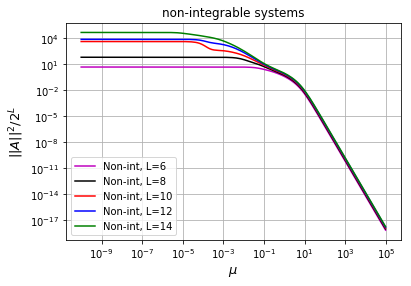

In [50]:
plt.loglog(x1[0:150],y1[0:150]/2**6, 'm-', label='Non-int, L=6')
plt.loglog(x3[0:150],y3[0:150]/2**8, 'k-', label='Non-int, L=8')
#plt.loglog(x4,y4/2**8, 'k+-', label='Int, L=8')
plt.loglog(x5[0:150],y5[0:150]/2**10, 'r-', label='Non-int, L=10')
#plt.loglog(x6,y6/2**10, 'r+-', label='Int, L=10')
plt.loglog(x7[0:150],y7[0:150]/2**12, 'b-', label='Non-int, L=12')
plt.loglog(x9[0:150],y9[0:150]/2**14, 'g-', label='Non-int, L=14')
#plt.loglog(x8,y8/2**12, 'b+-', label='Int, L=12')
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$\mu$", fontsize=13)
plt.title ("non-integrable systems")
plt.legend(loc='best')
plt.grid()
plt.savefig("v2.0_norm_mu_scaling_nonint.eps")

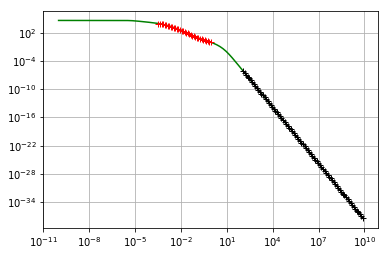

In [66]:
plt.loglog(x9[0:150],y9[0:150]/2**14, 'g-', label='Non-int, L=14')
plt.loglog(x9[120:-1],y9[120:-1]/2**14, 'k+-', label='Non-int, L=14')
plt.loglog(x9[65:100],y9[65:100]/2**14, 'r+-', label='Non-int, L=14')
plt.grid()

### Slopes of L=14: non-integrable

In [58]:
from scipy.optimize import curve_fit
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c
xdata =x9[150:-1]
ydata = y9[150:-1]/2**14
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)
a_in,b_in=popt
hz=(np.sqrt(5)+1)/4 
L=14
print " num,th:", np.exp(a_in), 4*(L*hz**2+2*(L-1))

[ 4.94629214 -4.        ] [  3.27666397e-19   1.06404488e-21]
 num,th: 140.652475496 140.652475842


In [65]:
from scipy.optimize import curve_fit
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c
xdata =x9[65:100]
ydata = y9[65:100]/2**14
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)
a_in,b_in=popt
hz=(np.sqrt(5)+1)/4 
L=14
print " num", np.exp(a_in)

[-0.25002255 -1.25832005] [ 0.00602847  0.00027574]
 num 0.778783224733


### Slopes of L=14: integrable

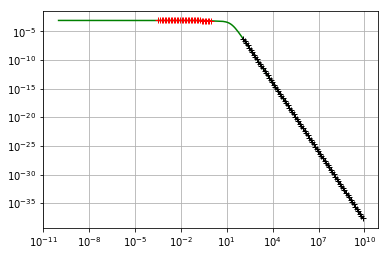

In [68]:
plt.loglog(x10[0:150],y10[0:150]/2**14, 'g-', label='int, L=14')
plt.loglog(x10[120:-1],y10[120:-1]/2**14, 'k+-', label='int, L=14')
plt.loglog(x10[65:100],y10[65:100]/2**14, 'r+-', label='int, L=14')
plt.grid()

In [73]:
from scipy.optimize import curve_fit
L=14
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c
xdata =x10[150:-1]
ydata = y10[150:-1]/2**L
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)
a_in,b_in=popt
print " num,th:", np.exp(a_in), 4*2*(L-1)

[ 4.64439087 -4.        ] [  4.89005412e-17   1.58796782e-19]
 num,th: 103.999996872 104


### Slope of L=10: weird looking case

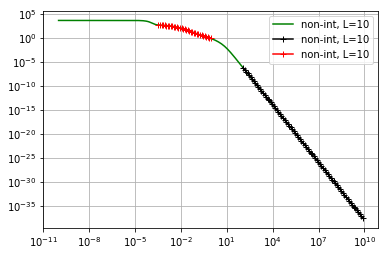

In [79]:
plt.loglog(x5[0:150],y5[0:150]/2**10, 'g-', label='non-int, L=10')
plt.loglog(x5[120:-1],y5[120:-1]/2**10, 'k+-', label='non-int, L=10')
plt.loglog(x5[65:100],y5[65:100]/2**10, 'r+-', label='non-int, L=10')
plt.grid()
plt.legend(loc='best')

In [80]:
from scipy.optimize import curve_fit
L=10
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c
xdata =x5[150:-1]
ydata = y5[150:-1]/2**L
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)
a_in,b_in=popt
hz=(np.sqrt(5)+1)/4 

print " num,th:", np.exp(a_in), 4*(L*hz**2+2*(L-1))

[ 4.58680599 -4.        ] [  3.17494603e-19   1.03101366e-21]
 num,th: 98.1803396496 98.1803398875


In [81]:
from scipy.optimize import curve_fit
L=14
def gfunc(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c
xdata =x9[65:100]
ydata = y9[65:100]/2**L
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)
a_in,b_in=popt
hz=(np.sqrt(5)+1)/4 

print " num", np.exp(a_in)

[-0.25002255 -1.25832005] [ 0.00602847  0.00027574]
 num 0.778783224733


In [82]:
w1,z1=np.loadtxt("Test_v2.0_L10_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
w2,z2=np.loadtxt("Test_v2.0_L10_int_mu_scaling.dat",unpack=True,skiprows=3)

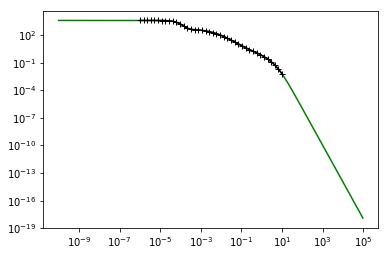

In [83]:
plt.loglog(x5[0:150],y5[0:150]/2**10, 'g-', label='non-int, L=10')
plt.loglog(w1,z1/2**10, 'k+-', label='non-int, L=10')

### Min $\omega_{ij}$

In [115]:
L_arr=[6,8,10,12,14]
wij_min_int=[9.53783318914105393560e-02,8.58094094015271480203e-03,2.31945041170633636796e-03,7.58371697617832296601e-05,2.18897788126781733808e-05 ]  
wij_max_int=[6.05007524585565619191e+01,8.07012575382429844240e+01,1.00901762617934508626e+02,1.21102267697626047038e+02, 1.41302772777317727559e+02  ] 

In [116]:
wij_min_nonint=[1.72247690934845820721e-03,3.77997266269858300802e-05,6.03912548413632066513e-07,2.30793375521898269653e-08,8.63927596128633012995e-10]  
wij_max_nonint=[1.82585719542567090912e+01,2.47011449094245136848e+01, 3.11411096892098200328e+01,3.75791979082154909975e+01,4.40158972270751434053e+01]

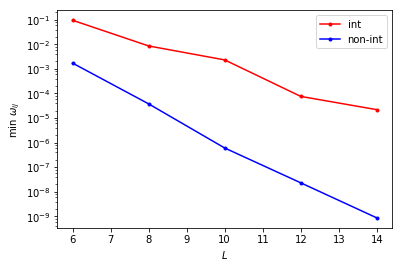

In [122]:
plt.semilogy(L_arr,wij_min_int, 'r.-', label='int')
plt.semilogy(L_arr,wij_min_nonint, 'b.-', label='non-int')
plt.ylabel(r"min $\omega_{ij}$")
plt.xlabel(r"$L$")
plt.legend(loc='best')
plt.savefig('min_wij.eps')

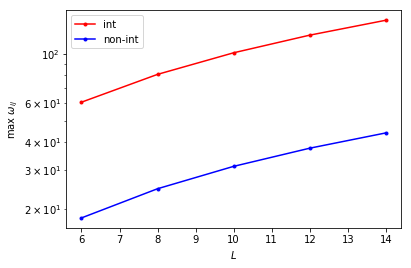

In [123]:
plt.semilogy(L_arr,wij_max_int, 'r.-', label='int')
plt.semilogy(L_arr,wij_max_nonint, 'b.-', label='non-int')
plt.ylabel(r"max $\omega_{ij}$")
plt.xlabel(r"$L$")
plt.legend(loc='best')
plt.savefig('max_wij.eps')

In [101]:
from scipy.optimize import curve_fit
L=14
def logfunc_poly(x, a,c): #logfunction
    return a+ c*x
def org_func(x, a,c):
    return a*x**c

def logfunc_exp(x,a,c):
    return a+ c*x
xdata = L_arr
ydata = wij_max_nonint
popt, pcov = curve_fit(logfunc_poly, np.log(xdata), np.log(ydata))
popt_exp, pcov_exp = curve_fit(logfunc_exp, xdata, np.log(ydata))
print popt, np.diag(pcov)
print popt_exp, np.diag(pcov_exp)
a,b=popt_exp
print np.exp(a), b #both exponential and linear can be fitted here.

[ 1.04581385  1.03843201] [  4.57238134e-05   8.80124561e-06]
[ 2.30248619  0.10897167] [  7.23657221e-03   6.70052971e-05]
9.99901097348 0.108971673089


In [95]:
xdata =L_arr
ydata = wij_max_int
popt, pcov = curve_fit(gfunc, np.log(xdata), np.log(ydata))
print popt, np.diag(pcov)

[ 2.30893582  1.00112133] [  3.35425259e-08   6.45650478e-09]


In [102]:
xdata = L_arr
ydata = wij_min_nonint
popt, pcov = curve_fit(logfunc_poly, np.log(xdata), np.log(ydata))
popt_exp, pcov_exp = curve_fit(logfunc_exp, xdata, np.log(ydata))
print popt, np.diag(pcov)
print popt_exp, np.diag(pcov_exp)
a,b=popt_exp
print np.exp(a), b #both exponential and linear can be fitted here.

[ 24.91754598 -17.16347289] [ 3.75368933  0.7225369 ]
[ 4.34192043 -1.82060999] [ 0.30566202  0.0028302 ]
76.8549922898 -1.82060998962


In [114]:
print L_arr, a, b
print np.multiply(L_arr,a)

[6, 8, 10, 12, 14] 4.34192042936 -1.82060998962
[ 26.05152258  34.73536343  43.41920429  52.10304515  60.78688601]


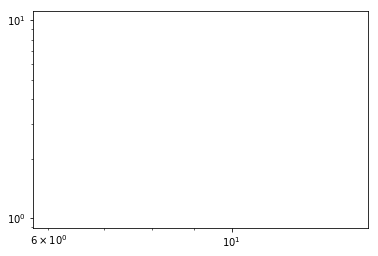

In [116]:
#plt.loglog(L_arr, np.multiply(L_arr,b) )

### Norm of exact gauge potential as a function of L

In [97]:
mu=1e-30
L_arr=range(2,11)
hz=5
norm_arr_int_mu_smaller=np.zeros(len(L_arr))
for i in range(len(L_arr)):
    L=L_arr[i]
    H=Ham_int_antiferro(L,hz)
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_int_mu_smaller[i]=norm(A_lamb)**2/2**L

In [98]:
mu=1e-30
L_arr=range(2,11)
norm_arr_nonint_mu_smaller=np.zeros(len(L_arr))
for i in range(len(L_arr)):
    L=L_arr[i]
    H=Ham_nonint(L)
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonint_mu_smaller[i]=norm(A_lamb)**2/2**L

In [56]:
L_arr=range(2,11)
L_arr= np.asarray(L_arr)
type(L_arr[0])

numpy.int64

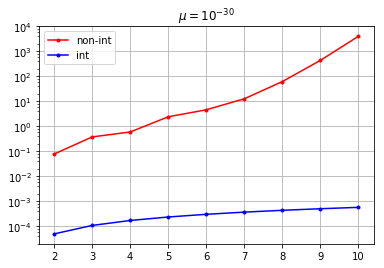

In [99]:
plt.semilogy(L_arr,norm_arr_nonint_mu_smaller, 'r.-', label='non-int')
plt.semilogy(L_arr,norm_arr_int_mu_smaller, 'b.-', label='int')
plt.grid()
plt.title(r"$\mu=10^{-30}$")
plt.legend()

In [109]:
print norm_arr_nonint_mu_smaller-norm_arr_nonint
print norm_arr_int_mu_smaller-norm_arr_int

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.84217094e-12
   5.17866283e-09]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [101]:
mu=1e-10
L_arr=range(2,11)
norm_arr_nonint=np.zeros(len(L_arr))
for i in range(len(L_arr)):
    L=L_arr[i]
    H=Ham_nonint(L)
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonint[i]=norm(A_lamb)**2/2**L

In [102]:
mu=1e-10
L_arr=range(2,11)
norm_arr_nonint=np.zeros(len(L_arr))
for i in range(len(L_arr)):
    L=L_arr[i]
    H=Ham_nonint(L)
    A_lamb=gauge_potent_mu(H,L,mu)
    norm_arr_nonint[i]=norm(A_lamb)**2/2**L

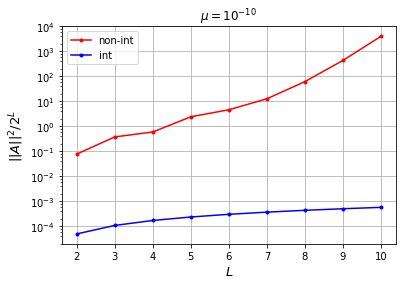

In [106]:
plt.semilogy(L_arr,norm_arr_nonint, 'r.-', label='non-int')
plt.semilogy(L_arr,norm_arr_int, 'b.-', label='int')
plt.grid()
plt.title(r"$\mu=10^{-10}$")
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$L$", fontsize=13)
plt.legend(loc='best')
plt.savefig("norm_L_scaling.eps")

In [114]:
print norm_arr_nonint[-1], norm_arr_int[-1]

3976.40476799 0.000566788516963


### Slope

In [5]:
def log_deriv(y,x):
    dy = np.zeros(len(y),np.float)
    dy[0:-1] = np.diff(np.log(y))/np.diff(np.log(x))
    dy[-1] = dy[-2]#(np.log(y[-1]) - np.log(y[-2]))/(np.log(x[-1]) - np.log(x[-2])) #last two elements are same
    return dy

In [3]:
x1,y1=np.loadtxt("v2.0_L6_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x2,y2=np.loadtxt("v2.0_L6_int_mu_scaling.dat",unpack=True,skiprows=3)
x3,y3=np.loadtxt("v2.0_L8_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x4,y4=np.loadtxt("v2.0_L8_int_mu_scaling.dat",unpack=True,skiprows=3)
x5,y5=np.loadtxt("v2.0_L10_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x6,y6=np.loadtxt("v2.0_L10_int_mu_scaling.dat",unpack=True,skiprows=3)
x7,y7=np.loadtxt("v2.0_L12_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x8,y8=np.loadtxt("v2.0_L12_int_mu_scaling.dat",unpack=True,skiprows=3)
x9,y9=np.loadtxt("v2.0_L14_nonint_mu_scaling.dat",unpack=True,skiprows=3 )
x10,y10=np.loadtxt("v2.0_L14_int_mu_scaling.dat",unpack=True,skiprows=3)

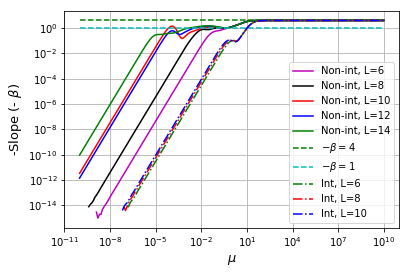

In [6]:
plt.loglog(x1,-1*(log_deriv(y1/2**6,x1)), 'm-', label='Non-int, L=6')
plt.loglog(x3,-1*(log_deriv(y3/2**8,x3)),'k-', label='Non-int, L=8')
plt.loglog(x5,-1*(log_deriv(y5/2**10,x5)), 'r-', label='Non-int, L=10')
plt.loglog(x7,-1*(log_deriv(y7/2**12,x7)), 'b-', label='Non-int, L=12')
plt.loglog(x9,-1*(log_deriv(y9/2**14,x9)), 'g-', label='Non-int, L=14')
plt.loglog(x5,4*np.ones(len(x5)), 'g--', label=r'$-\beta=4$')
plt.loglog(x5,np.ones(len(x5)), 'c--', label=r'$-\beta=1$')
plt.loglog(x2,-1*(log_deriv(y2/2**6,x2)), 'g-.', label='Int, L=6')
plt.loglog(x4,-1*(log_deriv(y4/2**8,x4)),'r-.', label='Int, L=8')
plt.loglog(x6,-1*(log_deriv(y6/2**10,x6)), 'b-.', label='Int, L=10')
plt.ylabel(r"-Slope (- $\beta$)", fontsize=13)
plt.xlabel(r"$\mu$", fontsize=13)
plt.legend(loc='best')
plt.savefig("v2_slope.eps")
plt.grid()

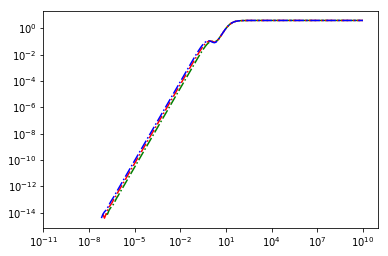

In [137]:
plt.loglog(x2,-1*(log_deriv(y2/2**6,x2)), 'g-.', label='Int, L=6')
plt.loglog(x4,-1*(log_deriv(y4/2**8,x4)),'r-.', label='Int, L=8')
plt.loglog(x6,-1*(log_deriv(y6/2**10,x6)), 'b-.', label='Int, L=10')